In [61]:
import glob
import pandas as pd
import os
import numpy as np

In [47]:
result_folder = "../results"
df = pd.DataFrame()
for result_file in glob.glob(os.path.join(result_folder, "experiment_*.csv")):
    df = pd.concat([df, pd.read_csv(result_file)])

In [48]:
df.loc[df.word=='XXXX', "stimulus_type"] = 'neutral'
df.stimulus_type.value_counts()

stimulus_type
neutral     1805
mismatch    1786
match       1755
Name: count, dtype: int64

In [49]:
df[df["api_time"] < 3].groupby("stimulus_type")["api_time"].mean()

stimulus_type
match       0.828404
mismatch    0.821296
neutral     0.837068
Name: api_time, dtype: float64

<Axes: title={'center': 'api_time'}, xlabel='stimulus_type'>

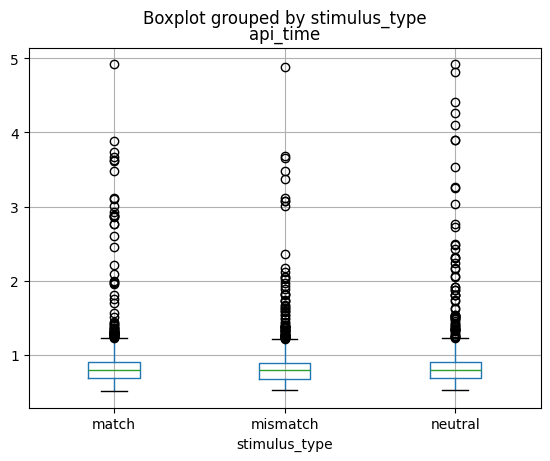

In [50]:
df[df["api_time"] < 5].boxplot(by="stimulus_type", column="api_time")

In [51]:
# anova on api_time per stimulus_type
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('api_time ~ C(stimulus_type)', data=df).fit()
anova_table = anova_lm(model)
print(anova_table)




                      df        sum_sq     mean_sq         F    PR(>F)
C(stimulus_type)     2.0  1.206086e+02   60.304320  0.309122  0.734104
Residual          5343.0  1.042327e+06  195.082643       NaN       NaN


In [52]:
# effect on accuracy
model = ols('accuracy ~ C(stimulus_type)', data=df).fit()
anova_table = anova_lm(model)
print(anova_table)





                      df     sum_sq   mean_sq         F    PR(>F)
C(stimulus_type)     2.0   0.009764  0.004882  1.139513  0.320052
Residual          5343.0  22.891283  0.004284       NaN       NaN


In [53]:
df.groupby("stimulus_type")["accuracy"].mean()

stimulus_type
match       0.997151
mismatch    0.996081
neutral     0.993906
Name: accuracy, dtype: float64

In [58]:
df


,participant_id,trial,word,color,response,correct_response,accuracy,retry_count,prompt_tokens,completion_tokens,total_tokens,response_logprob,second_best_response,second_best_logprob
0,1,1,RED,blue,b,b,1,0,8648,1,8649,0.0,m,-32.125
1,1,2,RED,blue,b,b,1,0,8648,1,8649,0.0,m,-32.625
2,1,3,RED,red,m,m,1,0,8648,1,8649,0.0,b,-30.750
3,1,4,XXXX,blue,b,b,1,0,8648,1,8649,0.0,m,-33.000
4,1,5,BLUE,blue,b,b,1,0,8648,1,8649,0.0,m,-28.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1,141,RED,red,m,m,1,1,8648,1,8649,0.0,b,-30.750
141,1,142,XXXX,blue,b,b,1,0,8648,1,8649,0.0,m,-33.000
142,1,143,XXXX,blue,b,b,1,1,8648,1,8649,0.0,m,-30.875
143,1,144,BLUE,blue,b,b,1,1,8648,1,8649,0.0,m,-29.250


642


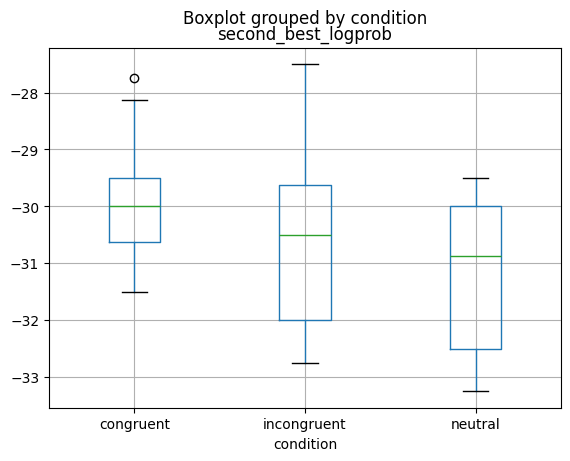

In [91]:
df = pd.read_csv("../results/experiment_20250415_015241.csv")
print(len(df))
df['condition'] = np.where(df['word'].str.lower()==df['color'], 'congruent', 'incongruent')
df.loc[df['word']=='XXXX', 'condition'] = 'neutral'
df.boxplot(by='condition', column='second_best_logprob')
# plot the distribution of second_best_logprob for each condition (e.g. via dist plot)
import plotly.express as px
px.histogram(df, x='second_best_logprob', color='condition',marginal="box",)


In [90]:
df

,participant_id,trial,word,color,response,correct_response,accuracy,retry_count,prompt_tokens,completion_tokens,total_tokens,response_logprob,second_best_response,second_best_logprob,alternative_sum,condition
0,1,1,XXXX,blue,b,b,1,0,8648,1,8649,0.0,m,-32.250,-28.075450,neutral
1,1,2,XXXX,blue,b,b,1,0,8648,1,8649,0.0,m,-32.875,-28.369080,neutral
2,1,3,XXXX,red,m,m,1,0,8648,1,8649,0.0,b,-30.000,-22.987423,neutral
3,1,4,XXXX,blue,b,b,1,0,8648,1,8649,0.0,m,-32.250,-28.168704,neutral
4,1,5,BLUE,red,m,m,1,0,8648,1,8649,0.0,b,-29.625,-24.705262,incongruent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,2,47,BLUE,blue,b,b,1,1,8648,1,8649,0.0,m,-30.500,-27.323426,congruent
407,2,48,RED,red,m,m,1,1,8648,1,8649,0.0,b,-30.875,-23.609581,congruent
408,2,49,RED,blue,b,b,1,0,8648,1,8649,0.0,m,-30.250,-26.605879,incongruent
409,2,50,RED,blue,b,b,1,1,8648,1,8649,0.0,m,-30.250,-26.292463,incongruent


1146


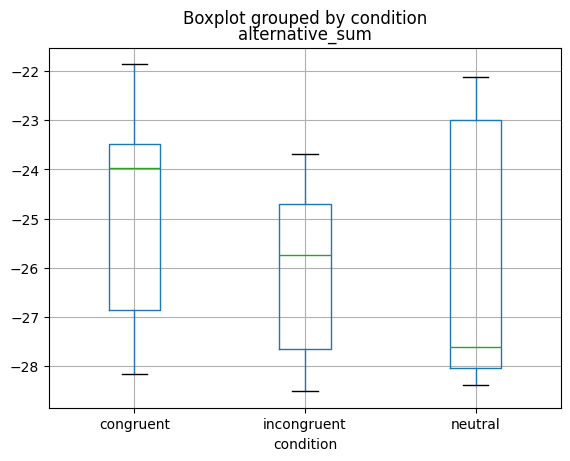

In [114]:
df = pd.read_csv("../results/experiment_20250415_022015.csv")
print(len(df))
df['condition'] = np.where(df['word'].str.lower()==df['color'], 'congruent', 'incongruent')
df.loc[df['word']=='XXXX', 'condition'] = 'neutral'
df.boxplot(by='condition', column='alternative_sum')
import plotly.express as px
px.histogram(df, x='alternative_sum', 
             color='word',marginal="box",
             facet_col='color', 
             color_discrete_map={'BLUE': 'blue', 'RED': 'red', 'XXXX': 'gray'})


In [115]:
px.histogram(df, x='alternative_sum', 
             color='color',marginal="box",
             facet_col='condition')


In [ ]:
df = pd.read_csv('../results/experiment_20250415_043021.csv')